In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os 
from time import time
from time import sleep

In [2]:
# Method for running the api for this example

def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }

    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # for having the forating in a proper manner
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    # normalizing data and making it prety in data frame
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    # display(df2)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    # appending data in csv file
    if not os.path.isfile(r'C:\Users\PRABHAT\Jupyter_Notebook\csv_files\crypto_data.csv'):
        df2.to_csv(r'C:\Users\PRABHAT\Jupyter_Notebook\csv_files\crypto_data.csv', header='column_names')
    else:
        df2.to_csv(r'C:\Users\PRABHAT\Jupyter_Notebook\csv_files\crypto_data.csv', mode='a', header=False)

    

In [3]:
import os 
from time import time
from time import sleep

for i in range(30):
    api_runner()
    print('API Runner completed')
    sleep(30) #sleep for 0.5 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [5]:
# for having the forating in a proper manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

all_data = pd.read_csv(r'C:\Users\PRABHAT\Jupyter_Notebook\csv_files\crypto_data.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
all_data

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10594,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19559662.00000,19559662.00000,False,NaN,1,NaN,NaN,NaN,2023-12-03T12:10:00.000Z,39460.01432,15855464075.69786,2.31070,-0.15999,1.82335,4.79097,15.42940,43.26183,52.50875,771824542694.74451,52.05050,828660300806.30005,NaN,2023-12-03T12:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 17:42:09.751908
1,1,1027,Ethereum,ETH,ethereum,7947,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120234245.26881,120234245.26881,True,NaN,2,NaN,NaN,NaN,2023-12-03T12:10:00.000Z,2156.10608,9783667298.18160,37.10400,-0.43759,2.69001,3.49478,20.72679,31.04687,32.14729,259237787266.03690,17.48200,259237787266.04001,NaN,2023-12-03T12:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 17:42:09.751908
2,2,825,Tether USDt,USDT,tether,67216,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,89596999295.46779,92609951832.05025,True,NaN,3,NaN,NaN,NaN,2023-12-03T12:09:00.000Z,1.00008,33292383667.58520,18.98410,-0.01773,-0.02991,-0.03917,-0.00497,0.00642,0.05174,89603989557.08780,6.04310,92617177160.99001,NaN,2023-12-03T12:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-03 17:42:09.751908
3,3,1839,BNB,BNB,bnb,1810,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151698368.33236,151698368.33236,False,NaN,4,NaN,NaN,NaN,2023-12-03T12:09:00.000Z,228.00289,667131940.63219,16.81010,-0.41237,0.34829,-2.40661,0.37779,7.25805,6.71458,34587666982.61770,2.33250,34587666982.62000,NaN,2023-12-03T12:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 17:42:09.751908
4,4,52,XRP,XRP,xrp,1162,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53888571585.00000,99988188647.00000,False,NaN,5,NaN,NaN,NaN,2023-12-03T12:10:00.000Z,0.62666,907220583.78240,31.35470,-0.19682,2.13135,-0.99002,4.05194,17.53255,24.99489,33769575414.20526,2.27750,62665560472.20000,NaN,2023-12-03T12:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 17:42:09.751908
5,5,5426,Solana,SOL,solana,557,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,424333585.12976,564017962.64643,True,NaN,6,NaN,NaN,NaN,2023-12-03T12:10:00.000Z,63.38939,1459634582.45205,15.27960,-0.36955,2.04044,9.76768,62.71448,169.43488,224.11622,26898245625.63114,1.81400,35752752617.71000,NaN,2023-12-03T12:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-03 17:42:09.751908
6,6,3408,USDC,USDC,usd-coin,15237,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24522622803.56231,24522622803.56231,False,NaN,7,NaN,NaN,NaN,2023-12-03T12:09:00.000Z,0.99972,3726808043.12072,4.54990,-0.01254,-0.01747,-0.01234,-0.03301,-0.02800,-0.02499,24515654661.63166,1.65330,24515654661.63000,NaN,2023-12-03T12:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-03 17:42:09.751908
7,7,2010,Cardano,ADA,cardano,989,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35307970959.96500,36410042820.42500,False,NaN,8,NaN,NaN,NaN,2023-12-03T12:09:00.000Z,0.39340,308729784.17995,44.92350,-0.42891,1.06782,0.62844,23.83897,53.39670,53.96321,13890138631.90767,0.93680,17702978150.30000,NaN,2023-12-03T12:09:00.000

In [6]:
coin_data = all_data.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
coin_data = coin_data.stack().to_frame(name='values')

coin_data

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.09823
            quote.USD.percent_change_24h   1.80744
            quote.USD.percent_change_7d    4.86860
            quote.USD.percent_change_30d  15.37275
            quote.USD.percent_change_60d  43.13999
            quote.USD.percent_change_90d  52.70387
Ethereum    quote.USD.percent_change_1h   -0.32401
            quote.USD.percent_change_24h   2.66515
            quote.USD.percent_change_7d    3.63725
            quote.USD.percent_change_30d  20.65401
            quote.USD.percent_change_60d  30.99608
            quote.USD.percent_change_90d  32.30673
Tether USDt quote.USD.percent_change_1h   -0.01391
            quote.USD.percent_change_24h  -0.02039
            quote.USD.percent_change_7d   -0.02940
            quote.USD.percent_change_30d  -0.00451
            quote.USD.percent_change_60d   0.01534
            quote.USD.percent_change_90d   0.04964
BNB         quote.USD.percent_change_1h   -0.29060
            quote.USD.percent_change_24h   0.25884
            quote.USD.percent_change_7d   -2.36276
            quote.USD.percent_change_30d   0.44121
            quote.USD.percent_change_60d   7.28597
            quote.USD.percent_change_90d   6.80728
XRP         quote.USD.percent_change_1h   -0.35195
            quote.USD.percent_change_24h   2.07968
            quote.USD.percent_change_7d   -1.08240
            quote.USD.percent_change_30d   4.05247
            quote.USD.percent_change_60d  17.39691
            quote.USD.percent_change_90d  24.94424
Solana      quote.USD.percent_change_1h   -0.15314
            quote.USD.percent_change_24h   2.04414
            quote.USD.percent_change_7d    9.72926
            quote.USD.percent_change_30d  62.43330
            quote.USD.percent_change_60d 169.43213
            quote.USD.percent_change_90d 224.51081
USDC        quote.USD.percent_change_1h   -0.01184
            quote.USD.percent_change_24h  -0.01784
            quote.USD.percent_change_7d   -0.01018
            quote.USD.percent_change_30d  -0.03446
            quote.USD.percent_change_60d  -0.02284
            quote.USD.percent_change_90d  -0.03200
Cardano     quote.USD.percent_change_1h   -0.28555
            quote.USD.percent_change_24h   1.10453
            quote.USD.percent_change_7d    0.71587
            quote.USD.percent_change_30d  24.05704
            quote.USD.percent_change_60d  53.42753
            quote.USD.percent_change_90d  54.04223
Dogecoin    quote.USD.percent_change_1h   -0.09858
            quote.USD.percent_change_24h   1.09757
            quote.USD.percent_change_7d    9.06793
            quote.USD.percent_change_30d  26.47095
            quote.USD.percent_change_60d  38.90262
            quote.USD.percent_change_90d  34.48640
TRON        quote.USD.percent_change_1h   -0.04430
            quote.USD.percent_change_24h   0.37024
            quote.USD.percent_change_7d   -4.57620
            quote.USD.percent_change_30d   5.69646
            quote.USD.percent_change_60d  16.36178
            quote.USD.percent_change_90d  34.48471
Chainlink   quote.USD.percent_change_1h   -0.33173
            quote.USD.percent_change_24h   2.24377
            quote.USD.percent_change_7d    5.49385
            quote.USD.percent_change_30d  45.71279
            quote.USD.percent_change_60d 111.15808
            quote.USD.percent_change_90d 163.16587
Toncoin     quote.USD.percent_change_1h   -0.99579
            quote.USD.percent_change_24h  -0.04912
            quote.USD.percent_change_7d    1.50721
            quote.USD.percent_change_30d   9.45471
            quote.USD.percent_change_60d  20.65559
            quote.USD.percent_change_90d  27.49447
Avalanche   quote.USD.percent_change_1h   -0.23221
            quote.USD.percent_change_24h  -0.05959
            quote.USD.percent_change_7d    4.64533
            quote.USD.percent_change_30d  88.66370
            quote.USD.percent_change_60d 125.48123
            quo

In [7]:
length = coin_data.count()['values']

# here we will be doing the indexing for columns as it will be easy
index = pd.Index(range(length))

In [8]:
# setting the above index in dataframe
coin_data2 = coin_data.reset_index()

# changing the column name as well
coin_data2 = coin_data2.rename(columns={'level_1':'percent_change'})

In [9]:
# changing sub columns names as well.
coin_data2['percent_change'] = coin_data2['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
coin_data2

,name,percent_change,values
0,Bitcoin,1h,-0.09823
1,Bitcoin,24h,1.80744
2,Bitcoin,7d,4.86860
3,Bitcoin,30d,15.37275
4,Bitcoin,60d,43.13999
5,Bitcoin,90d,52.70387
6,Ethereum,1h,-0.32401
7,Ethereum,24h,2.66515
8,Ethereum,7d,3.63725
9,Ethereum,30d,20.65401


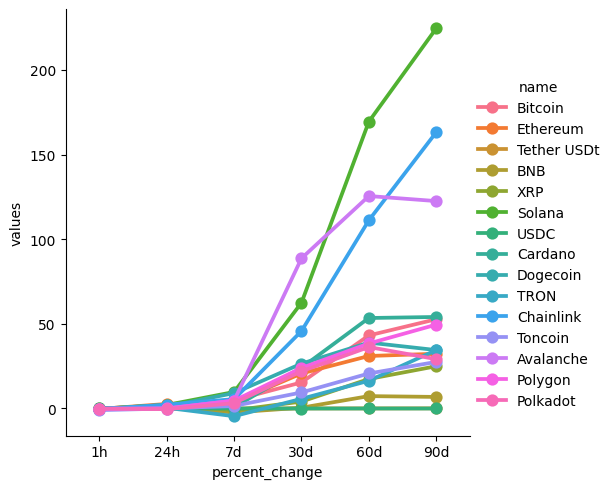

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=coin_data2, kind='point')

In [11]:
new_dataframe = all_data[['name','quote.USD.price','Timestamp']]
new_dataframe = new_dataframe.query("name == 'Bitcoin'")
new_dataframe

,name,quote.USD.price,Timestamp
0,Bitcoin,39460.01432,2023-12-03 17:42:09.751908
15,Bitcoin,39459.20519,2023-12-03 17:42:40.707426
30,Bitcoin,39459.20519,2023-12-03 17:43:11.660526
45,Bitcoin,39467.66769,2023-12-03 17:43:42.774522
60,Bitcoin,39467.66769,2023-12-03 17:44:14.098831
75,Bitcoin,39465.33177,2023-12-03 17:44:45.066888
90,Bitcoin,39465.33177,2023-12-03 17:45:16.051367
105,Bitcoin,39470.79323,2023-12-03 17:45:47.457938
120,Bitcoin,39470.79323,2023-12-03 17:46:18.417029
135,Bitcoin,39470.75275,2023-12-03 17:46:49.380583


In [12]:
from datetime import datetime

time_data = new_dataframe['Timestamp']
# time_data
time_data = time_data.apply(lambda y: datetime.strptime(y, '%Y-%m-%d %H:%M:%S.%f')).apply(lambda x: x.strftime('%M:%S'))
new_dataframe['Timestamp'] = time_data.values
new_dataframe = new_dataframe.rename(columns={'name':'Crypto Name', 'quote.USD.price':'Price'})

In [13]:
new_dataframe

,Crypto Name,Price,Timestamp
0,Bitcoin,39460.01432,42:09
15,Bitcoin,39459.20519,42:40
30,Bitcoin,39459.20519,43:11
45,Bitcoin,39467.66769,43:42
60,Bitcoin,39467.66769,44:14
75,Bitcoin,39465.33177,44:45
90,Bitcoin,39465.33177,45:16
105,Bitcoin,39470.79323,45:47
120,Bitcoin,39470.79323,46:18
135,Bitcoin,39470.75275,46:49


<Axes: xlabel='Timestamp', ylabel='Price'>

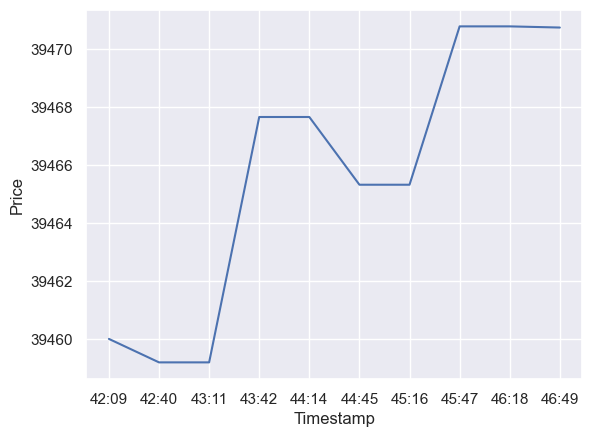

In [14]:
sns.set_theme(style="darkgrid")
new_dataForViews = new_dataframe.head(10)

sns.lineplot(x='Timestamp', y='Price', data = new_dataForViews)